In [55]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd

In [56]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [57]:
X_train.shape

(50000, 32, 32, 3)

In [58]:
y_train.shape

(50000, 1)

In [59]:
X_test.shape

(10000, 32, 32, 3)

In [60]:
y_test.shape

(10000, 1)

[1]


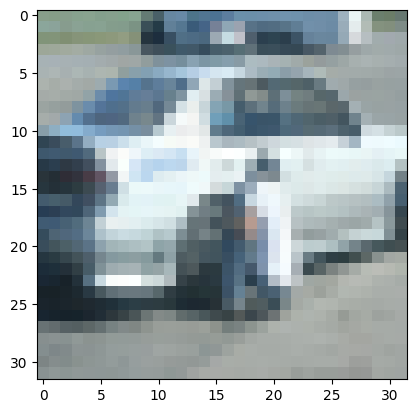

In [61]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


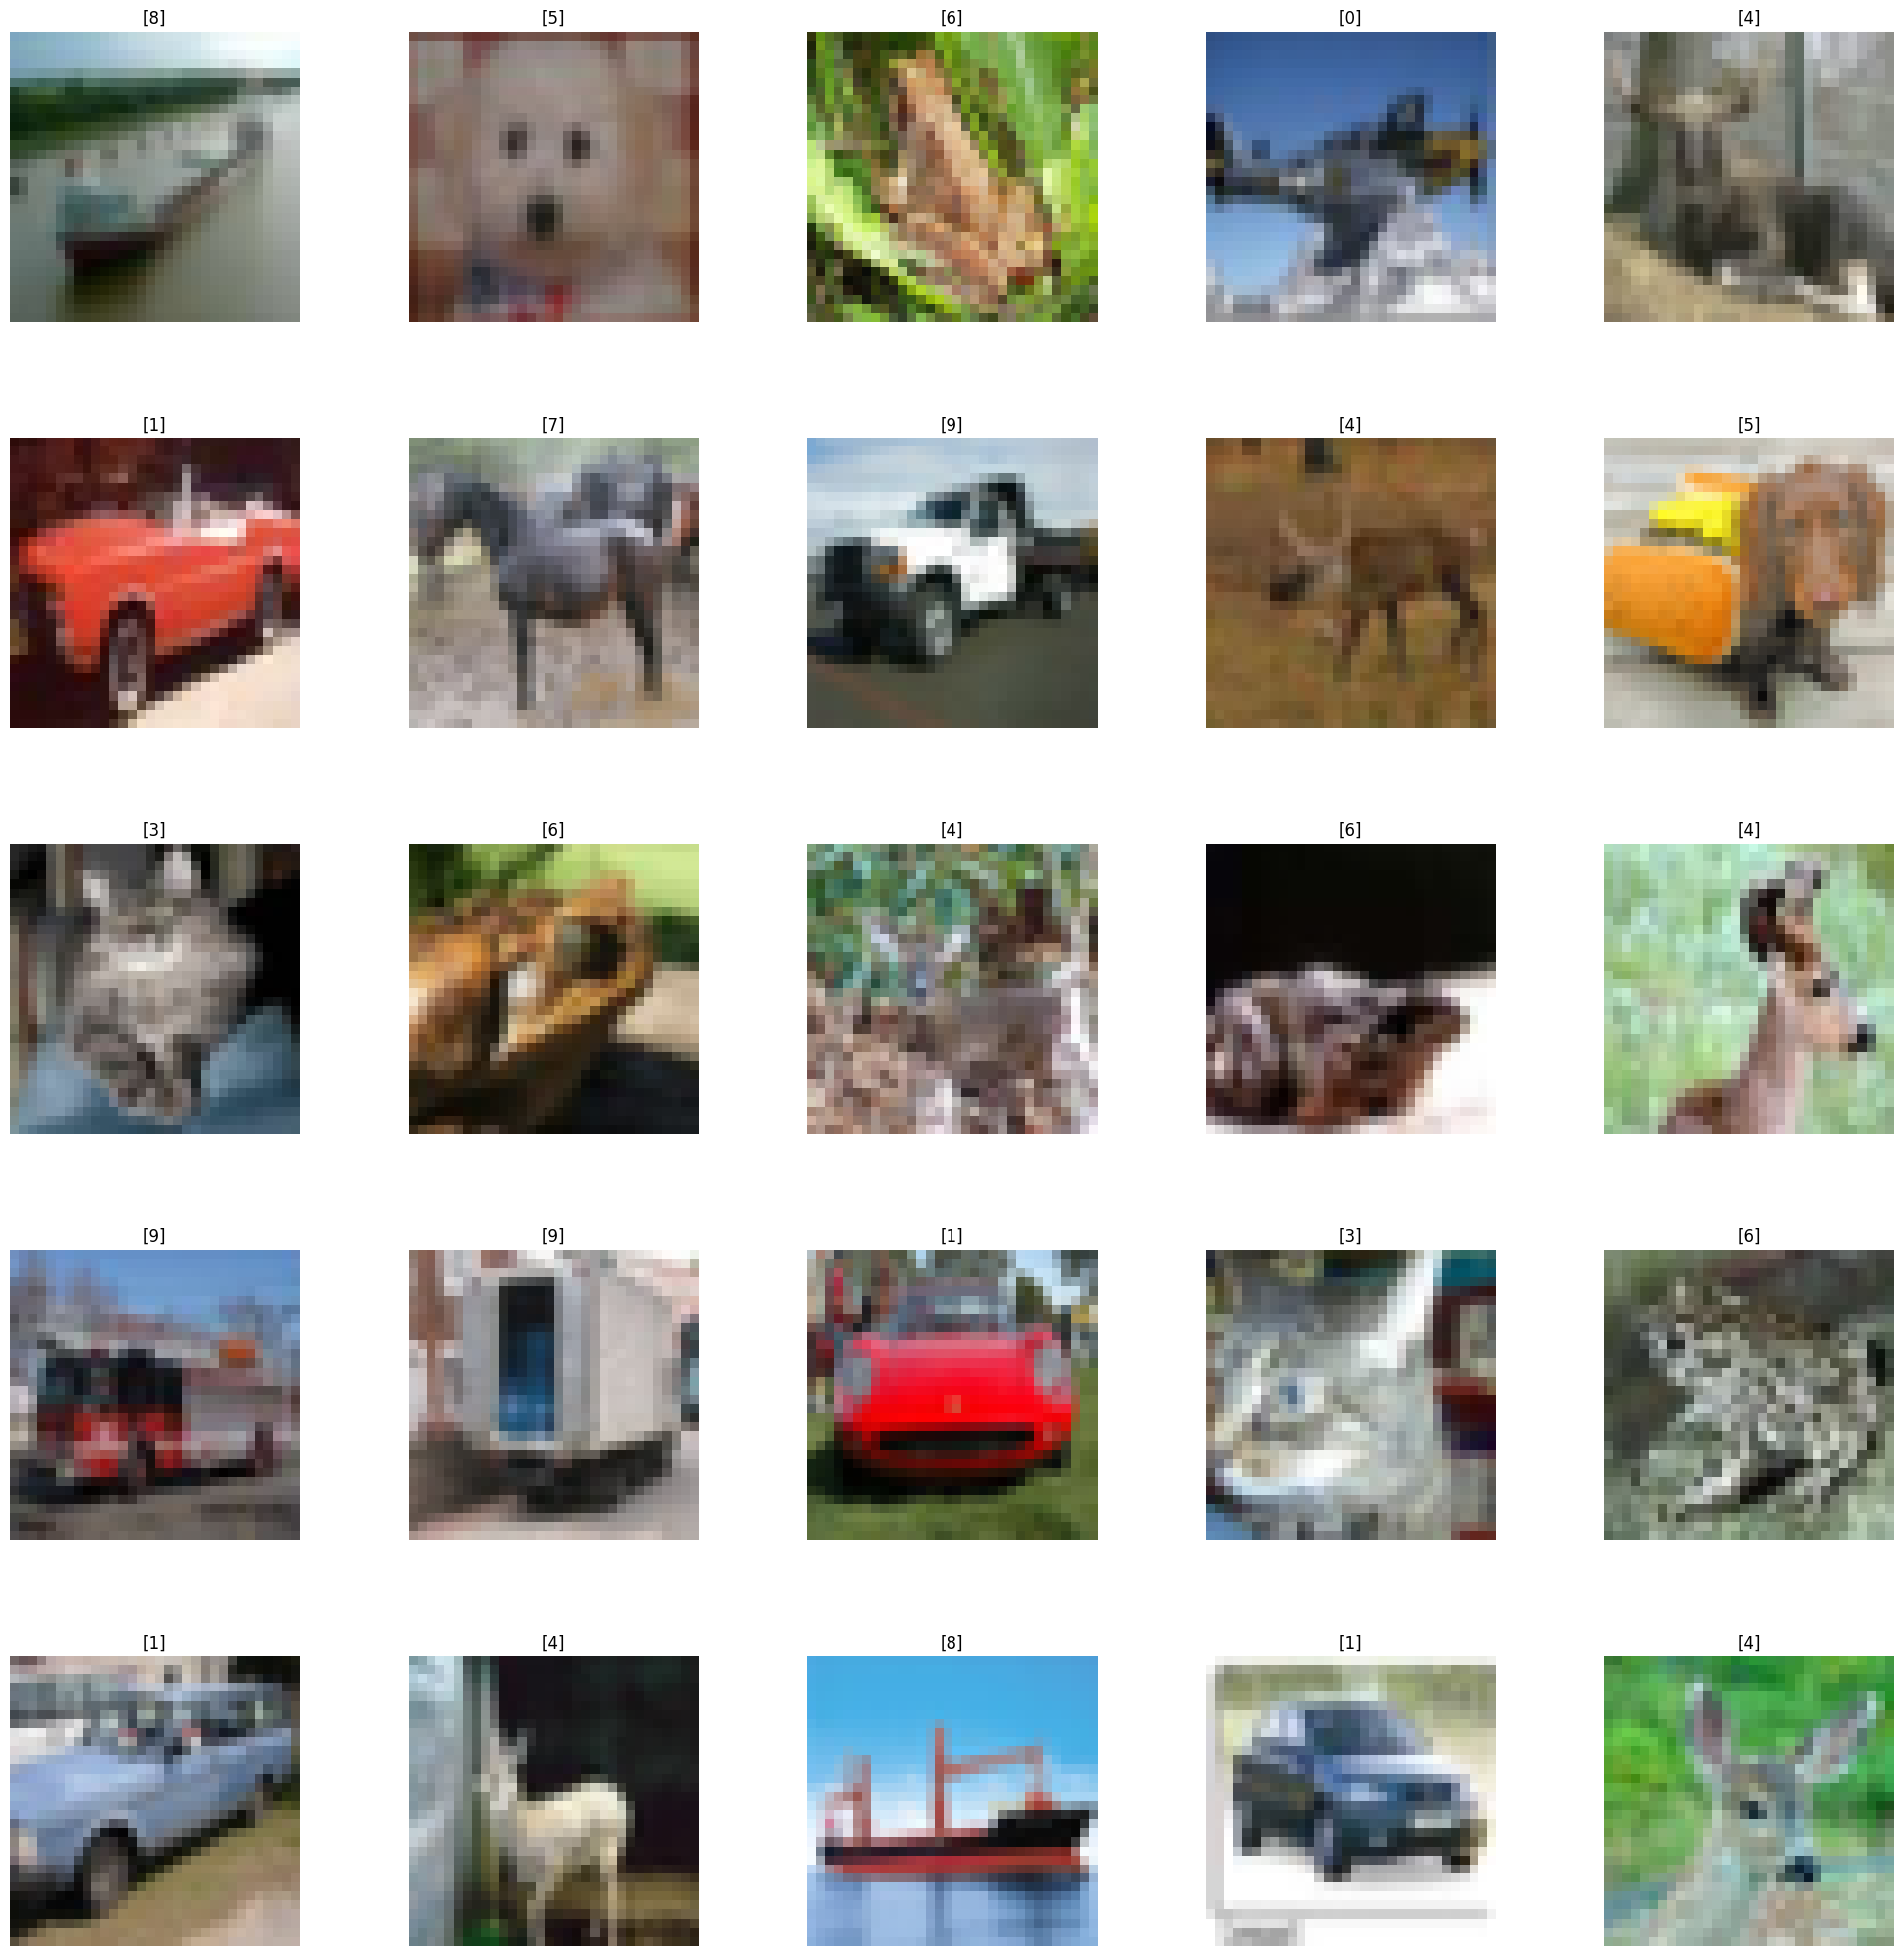

In [62]:
L_grid = 5
W_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace = 0.4)

In [63]:
n_training

50000

In [64]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [66]:
number_cat = 10

In [67]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [68]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [69]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [71]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [72]:
X_train = X_train/255
X_test = X_test/255

In [73]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [74]:
X_train.shape

(50000, 32, 32, 3)

In [75]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [76]:
y_train.shape

(50000, 10)

In [77]:
Input_shape = X_train.shape[1:]

In [78]:
Input_shape

(32, 32, 3)

In [79]:
cnn_model = tf.keras.models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn_model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(1024, activation = 'relu'))
cnn_model.add(tf.keras.layers.Dropout(0.3))
cnn_model.add(layers.Dense(1024, activation = 'relu'))
cnn_model.add(layers.Dense(10, activation = 'softmax'))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [80]:
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
epochs_hist = cnn_model.fit(X_train, y_train, epochs = 100, batch_size = 512)

Epoch 1/100
98/98 [==============================] - 6s 35ms/step - loss: 1.7320 - accuracy: 0.3588
Epoch 2/100
98/98 [==============================] - 3s 35ms/step - loss: 1.3311 - accuracy: 0.5166
Epoch 3/100
98/98 [==============================] - 3s 35ms/step - loss: 1.1588 - accuracy: 0.5869
Epoch 4/100
98/98 [==============================] - 3s 35ms/step - loss: 1.0345 - accuracy: 0.6306
Epoch 5/100
98/98 [==============================] - 3s 36ms/step - loss: 0.9333 - accuracy: 0.6711
Epoch 6/100
98/98 [==============================] - 3s 35ms/step - loss: 0.8501 - accuracy: 0.6995
Epoch 7/100
98/98 [==============================] - 3s 34ms/step - loss: 0.7876 - accuracy: 0.7238
Epoch 8/100
98/98 [==============================] - 4s 38ms/step - loss: 0.7228 - accuracy: 0.7462
Epoch 9/100
98/98 [==============================] - 3s 35ms/step - loss: 0.6625 - accuracy: 0.7680
Epoch 10/100
98/98 [==============================] - 3s 34ms/step - loss: 0.6222 - accuracy: 0.7818

In [82]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

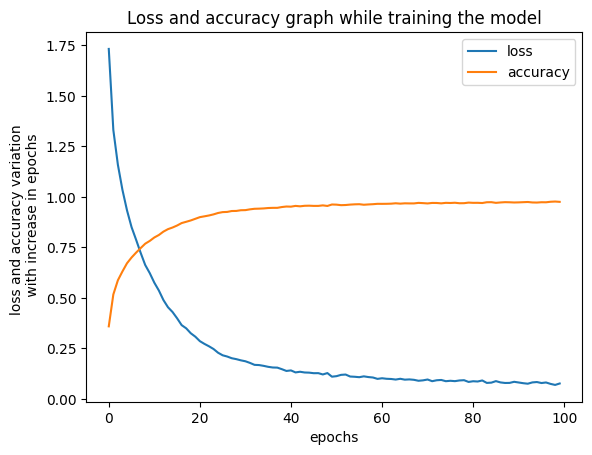

In [83]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
plt.plot(eh)
plt.plot(eh2)
plt.title("Loss and accuracy graph while training the model")
plt.xlabel("epochs")
plt.ylabel("loss and accuracy variation \n with increase in epochs")
plt.legend({'loss', 'accuracy'})

In [84]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.8580 - accuracy: 0.7869
test Accuracy: 0.786899983882904


In [105]:
predicted_classes = cnn_model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [106]:
class_x = np.argmax(predicted_classes, axis = 1)

In [107]:
class_x

array([3, 8, 8, ..., 5, 1, 7])

In [115]:
y_test

0

In [120]:
y_test = np.argmax(predicted_classes, axis = 1 )

In [121]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

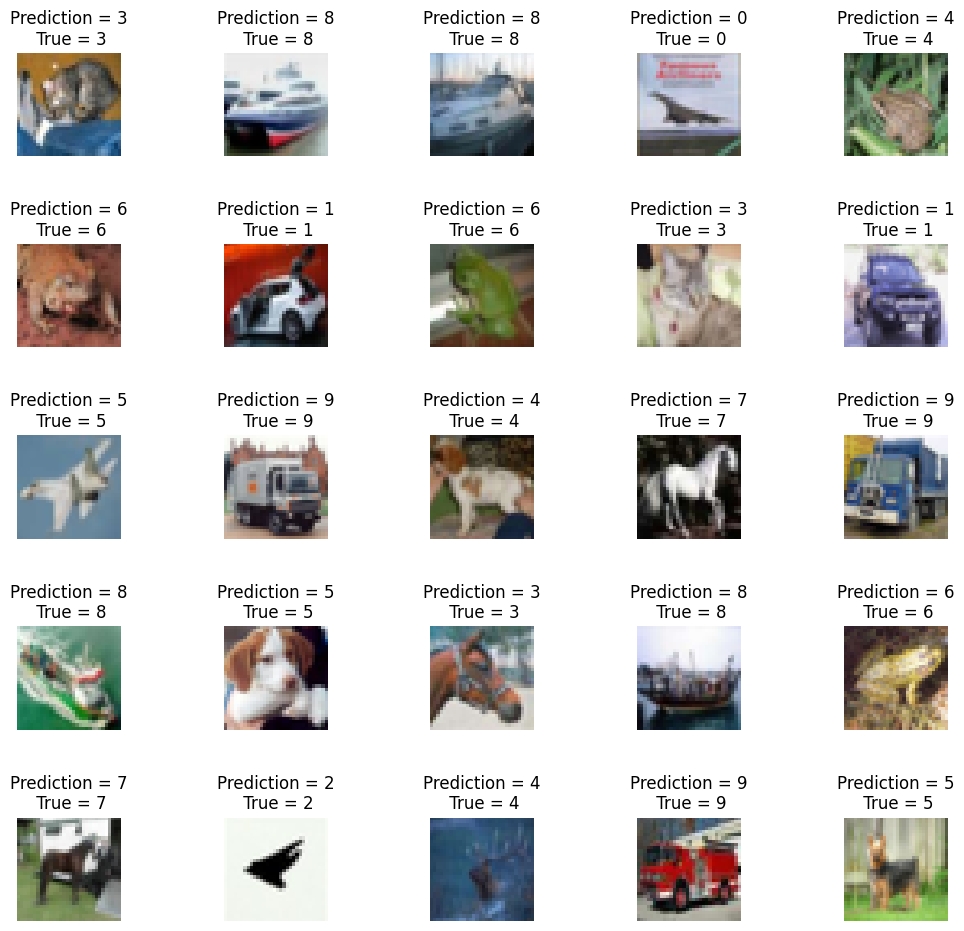

In [125]:
W = 5
L = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title("Prediction = {}\n True = {}".format(class_x[i], y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1)